In [1]:
import pandas as pd

In [74]:
dataset_path = '../data/dataset.csv.zip'
df = pd.read_csv(dataset_path)
df['registry_timestamp'] = pd.to_datetime(df.DATAHORA_REGISTRO_BO)

In [75]:
df.DATA_OCORRENCIA_BO

0        01/28/2011
1        11/02/2011
2        06/17/2019
3        07/13/2008
4        07/20/2008
            ...    
42932    12/25/2136
42933    12/26/2136
42934    12/27/2136
42935    12/28/2136
42936    12/29/2136
Name: DATA_OCORRENCIA_BO, Length: 42937, dtype: object

In [153]:
ind = df.LOGRADOURO.str.contains('RODOVIA')
#ind &= df.LOGRADOURO.str.contains('FERNAO')
ind &= df.DESCR_CONDUTA == 'TRANSEUNTE'
ind = ~pd.isnull(ind) & (ind == True)
df2 = df.loc[ind]

In [154]:
i = 0
print(df2.loc[ind].iloc[i].OBSERVACAO_OBJETO)
df2.loc[ind].iloc[i]


MARCA CERVELO P3 ULTEGRA -COR BRANCA


ID_DELEGACIA                                                          10101
NOME_DEPARTAMENTO                  DECAP                                   
NOME_SECCIONAL                     DEL.SEC.1º CENTRO                       
NOME_DELEGACIA                               01º D.P. SE                   
CIDADE                             GUARULHOS                               
ANO_BO                                                                 2015
NUM_BO                                                                 3020
DESCR_SOLUCAO                                ENCAMINHAMENTO DP ÁREA DO FATO
DESCR_PROVIDENCIA                                                       NaN
NOME_DEPARTAMENTO_CIRC             DEMACRO                                 
NOME_SECCIONAL_CIRC                DEL.SEC.GUARULHOS                       
NOME_DELEGACIA_CIRC                          03º D.P. GUARULHOS            
NOME_MUNICIPIO_CIRC                          GUARULHOS                     
DESCR_TIPO_B

In [155]:
df.loc[ind].iloc[40].OBSERVACAO_OBJETO

'RODAS BRANCAS E ACESSORIOS BRANCOS'

<AxesSubplot:xlabel='registry_timestamp'>

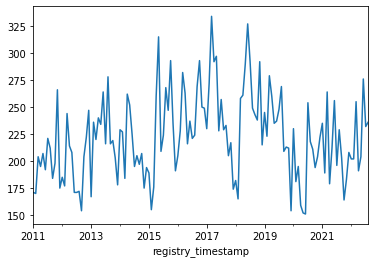

In [156]:
df.query('registry_timestamp > 2011').resample('1m', on='registry_timestamp').count().ID_DELEGACIA.plot()

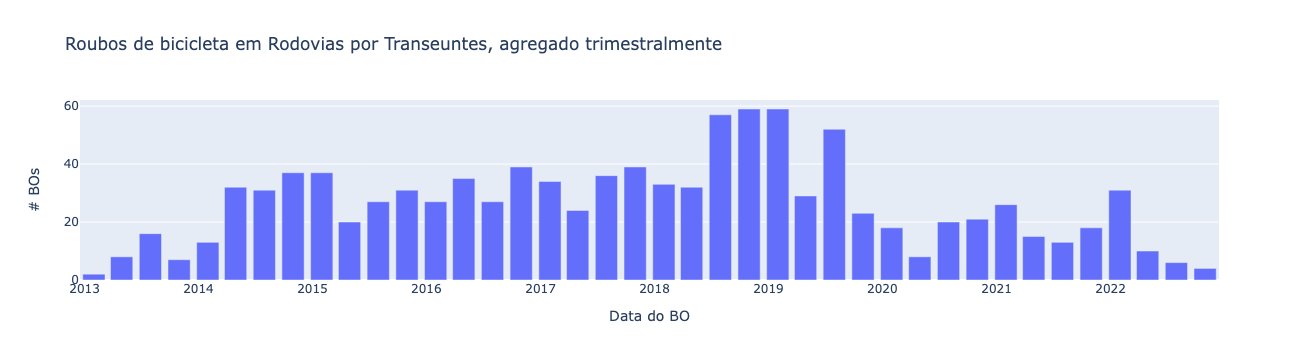

In [157]:
import plotly.express as px

df3 = df2.query('registry_timestamp >= "2013-01-01 00:00:00"').resample('3m', on='registry_timestamp').count().ID_DELEGACIA.reset_index()


px.bar(df3,
       x='registry_timestamp',
       y='ID_DELEGACIA',
       labels={'ID_DELEGACIA': '# BOs',
               'registry_timestamp': 'Data do BO'},
      title="Roubos de bicicleta em Rodovias por Transeuntes, agregado trimestralmente")

<AxesSubplot:ylabel='Frequency'>

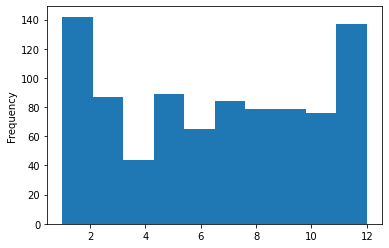

In [158]:
df2.query('registry_timestamp > "2015-01-01"').registry_timestamp.dt.month.plot(kind='hist')

In [ ]:
df2.query('registry_timestamp > "2015-01-01"').registry_timestamp.dt.month.plot(kind='hist')

In [159]:
df2.LOGRADOURO.value_counts().head(30)

RODOVIA SP 160                       101
RODOVIA DOS IMIGRANTES                68
RODOVIA SP 070                        64
RODOVIA SPA 248/055                   41
RODOVIA ANCHIETA                      28
RODOVIA SP 055                        28
RODOVIA SP 348                        23
RODOVIA AYRTON SENNA DA SILVA         22
RODOVIA SP 150                        22
RODOVIA SP 061                        22
RODOVIA PRESIDENTE DUTRA (BR 116)     21
RODOVIA SP 342                        20
RODOVIA ATILIO BALBO                  19
RODOVIA CONEGO DOMENICO RANGONI       17
RODOVIA PRES DUTRA                    15
RODOVIA AMADOR BUENO DA VEIGA         15
RODOVIA REGIS BITTENCOURT             14
RODOVIA CÔNEGO DOMÊNICO RANGONI       13
RODOVIA FERNAO DIAS                   13
RODOVIA SPA 1A 248/055                13
RODOVIA PRESIDENTE DUTRA              12
RODOVIA ABRÃO ASSED SP 333            12
RODOVIA AYRTON SENNA                  12
RODOVIA SP 147                        11
RODOVIA PADRE MA

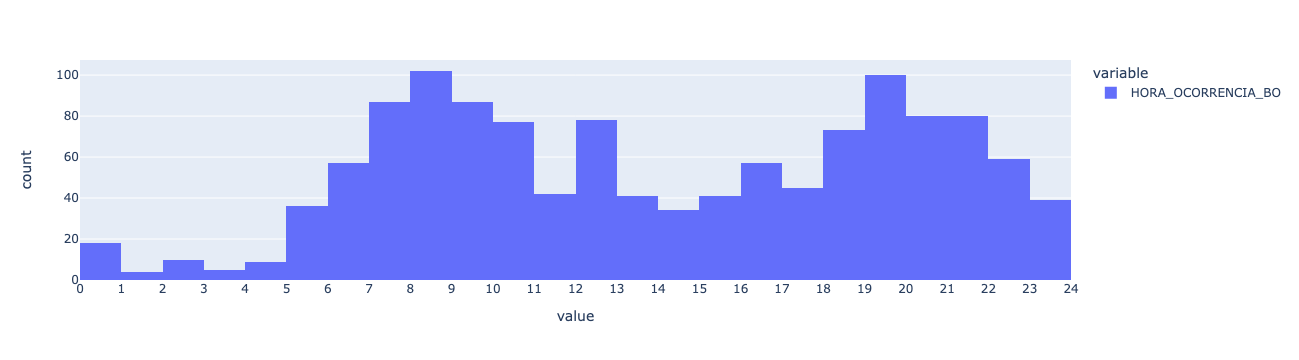

In [186]:
def f(s):
    if type(s) == str:
        lst = s.split(":")
        if len(lst) == 2:
            return int(lst[0]) + int(lst[1]) / 60
        else:
            return None
    else:
        return None

y = df2.HORA_OCORRENCIA_BO.map(lambda x: f(x))

fig = px.histogram(y, nbins=24)
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)
fig.show()

In [187]:
df

,ID_DELEGACIA,NOME_DEPARTAMENTO,NOME_SECCIONAL,NOME_DELEGACIA,CIDADE,ANO_BO,NUM_BO,DESCR_SOLUCAO,DESCR_PROVIDENCIA,NOME_DEPARTAMENTO_CIRC,...,NACIONALIDADE_PESSOA,NATURALIDADE_PESSOA,CONT_OBJETO,DESCR_MODO_OBJETO,DESCR_TIPO_OBJETO,DESCR_SUBTIPO_OBJETO,DESCR_UNIDADE,QUANTIDADE_OBJETO,OBSERVACAO_OBJETO,registry_timestamp
0,10004,DECAP,DECAP - SEDE,DEL.POL.METROPOLITANO,S.PAULO,2011,199,BO PARA INVESTIGAÇÃO,NaN,DECAP,...,BRASILEIRA,BORRAZOPOLIS -PR,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0,MODELO CROSS - CORES BRANCA/PRETA,2011-01-28 20:12:00
1,10004,DECAP,DECAP - SEDE,DEL.POL.METROPOLITANO,S.PAULO,2011,2479,ENCAM FEBEM/V.INFAN.JUVENTUDE,NaN,DECAP,...,BRASILEIRA,S.PAULO -SP,2,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,1.0,NaN,2011-11-02 09:51:00
2,10004,DECAP,DECAP - SEDE,DEL.POL.METROPOLITANO,S.PAULO,2019,1501,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DECAP,...,BRASILEIRA,S.PAULO -SP,2,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0,NaN,2019-06-17 22:37:00
3,10008,DOPE-DEPTO OP POL ESTRAT.,DIV.POL.PORTO/AERO/PROT.TURISTA,DOPE - 01ª DP DEATUR CAPITAL,GUARULHOS,2008,197,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,DEMACRO,...,BRASILEIRA,S.PAULO -SP,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0,ANO 2007,2008-09-09 15:37:00
4,10101,DECAP,DEL.SEC.1º CENTRO,01º D.P. SE,S.PAULO,2008,7439,BO PARA INVESTIGAÇÃO,NaN,DECAP,...,BRASILEIRA,S.PAULO -SP,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0,"COR AZUL, GARFO AMARELO, GARUPA",2008-07-20 18:01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42932,900023,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,PRAIA GRANDE,2022,26491,BO PARA REGISTRO,NaN,DEINTER 6 - SANTOS,...,Brasil,NaN,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,1.0,NaN,2022-06-06 16:44:00
42933,900023,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,ARTUR NOGUEIRA,2022,52563,ENCAMINHAMENTO DP ÁREA DO FATO,NaN,DEINTER 9 - PIRACICABA,...,Brasil,NaN,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,1.0,NaN,2022-06-29 15:44:00
42934,900023,DIPOL - DEPTO DE INTELIGENCIA,DELEGACIA ELETRONICA,DELEGACIA ELETRONICA 3,CACAPAVA,2022,94452,BO PARA REGISTRO,NaN,DEINTER 1 - SAO JOSE DOS CAMPOS,...,Brasil,NaN,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,NaN,1.0,NaN,2022-08-08 09:39:00
42935,900441,DOPE-DEPTO OP POL ESTRAT.,DIV.POL.PORTO/AERO/PROT.TURISTA,DOPE - 05ª DP PORTO DE SANTOS,SANTOS,2018,443,APRECIAÇÃO DO DELEGADO TITULAR,NaN,DEINTER 6 - SANTOS,...,BRASILEIRA,SANTOS -SP,1,SUBTRAÍDO,Esporte e lazer,Bicicleta ...,Unidade,1.0,NaN,2018-04-05 14:35:00
